In [173]:
import unicodecsv
from datetime import datetime as dt
from datetime import datetime

enrollments_filename = 'enrollments.csv'
engagement_filename = 'daily_engagement.csv'
submissions_filename = 'project_submissions.csv'

def readFile(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

def countUniqueStudents(list_to_count,key):
    unique_keys=[]
    for idx, val in enumerate(list_to_count):
        if val[key] not in unique_keys:
            unique_keys.append(val[key])
    return unique_keys

def createUniqueStudents(list_to_count,key):
    unique_keys={}
    unique_keys_list=[]
    n=0
    for idx, val in enumerate(list_to_count):
        if val[key] not in unique_keys_list:
            unique_keys[n]=val
            unique_keys_list.append(val[key])
            n+=1
    return unique_keys

def removeWrongIndex(listToRename, wrong_key, right_key):
    for idx, val in enumerate(listToRename):
        listToRename[idx][right_key]=val[wrong_key]
        del val[wrong_key]
    return listToRename

def compareUniqueStudents(full_list, list_to_compare):
    keys_not_in_list_to_compare=[]
    for idx, val in enumerate(full_list):
        if val not in list_to_compare:
            keys_not_in_list_to_compare.append(val)
    return keys_not_in_list_to_compare

def printEntriesNotInEgagement(full_list, list_to_compare):
    for idx, val in enumerate(full_list):
        if val['account_key'] in list_to_compare:
            break

# check how many students cancelled at all
def countNotCancelledStudents(list_to_count):
    unique_keys=[]
    for idx, val in enumerate(list_to_count):
        if val['join_date']!=val['cancel_date'] and val['account_key'] not in unique_keys:
            unique_keys.append(val['account_key'])
    return unique_keys            
            
def removeUdacity(data):
    non_udacity=[]
    for idx, val in enumerate(data):
        if val['account_key'] not in removed_students_key:
            non_udacity.append(val['account_key'])
    return non_udacity

def removeUdacity_list(data):
    unique_keys=[]
    for idx, val in enumerate(data):
        if val['account_key'] not in removed_students_key:
            unique_keys.append(val)
    return unique_keys

def udacityAccounts(list_to_remove):
    removed_students_key=set()
    for idx, val in enumerate(list_to_remove):
        if val['is_udacity']==True:
            removed_students_key.add(val['account_key'])
    return removed_students_key

def createPaidStudents(full_list):
    students={}
    for idx, val in enumerate(full_list):
        if val['is_canceled']==False or val['days_to_cancel'] >7:
            if val['account_key'] not in students or val['join_date'] > students[val['account_key']]:
                students[val['account_key']]=(val['join_date'])
    return students
    
enrollments = readFile(enrollments_filename)
daily_engagement = readFile(engagement_filename)
daily_engagement=removeWrongIndex(daily_engagement, 'acct', 'account_key')
project_submissions = readFile(submissions_filename)

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return 0
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)


# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

enrollment_num_rows = len(enrollments)

engagement_num_rows = len(daily_engagement)

submission_num_rows = len(project_submissions)

list_of_unique_keys_enrollment=countUniqueStudents(enrollments,'account_key')
list_of_unique_keys_engagement=countUniqueStudents(daily_engagement,'account_key')

keys_enrolled_but_no_engagement_entry=compareUniqueStudents(list_of_unique_keys_enrollment,list_of_unique_keys_engagement)

removed_students_key=udacityAccounts(enrollments)

non_udacity_enrollments=removeUdacity(enrollments)
non_udacity_engagement=removeUdacity(daily_engagement)
non_udacity_submissions=removeUdacity(project_submissions)

#paid_students=createPaidStudents(non_udacity_enrollments)
non_udacity_enrollments_list=removeUdacity_list(enrollments)
non_udacity_engagement_list=removeUdacity_list(daily_engagement)
non_udacity_submissions_list=removeUdacity_list(project_submissions)
paid_students=createPaidStudents(non_udacity_enrollments_list)

In [174]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def withinOneWeek(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [175]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


In [176]:
def firstWeek1(data, paid_students):
    new_data=[]
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
paid_engagement_in_first_week = firstWeek1(non_udacity_engagement_list, paid_students)

In [177]:
def firstWeek2(paid_students, daily_engagement):
    students=[]
    for val in daily_engagement:
        account_key=val['account_key']
        join_date=paid_students[account_key]
        engagement_date=datetime.strptime(val['utc_date']+' 00:00:00', '%Y-%m-%d %H:%M:%S')
        if withinOneWeek(join_date, engagement_date):
            students.append(val)
    return students
paid_engagement_in_first_week1 = firstWeek2(paid_students, paid_engagement_in_first_week)

In [255]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def createByAccount(data):
    by_account = defaultdict(list)
    for data_point in data:
        account_key = data_point['account_key']
        by_account[account_key].append(data_point)
    return by_account
engagement_by_account1=createByAccount(paid_engagement_in_first_week1)

In [256]:
from decimal import Decimal
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account1.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += Decimal(engagement_record['total_minutes_visited'])
    total_minutes_by_account[account_key] = total_minutes

In [257]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard Deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.7083267534282914572864322
Standard Deviation: 412.9969334085295843037642892
Minimum: 0.0
Maximum: 3564.733264499


In [258]:
def findTotal(engagement_by_account, str_item):
    total_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total = 0
        for engagement_record in engagement_for_student:
            total += float(engagement_record[str_item])
        total_by_account[account_key] = total
    return total_by_account

In [259]:
import numpy as np
def printStats(total_by_account, str):
    total = list(total_by_account.values())
    print (str)
    print ('Mean:', np.mean(total))
    print ('Standard Deviation:', np.std(total))
    print ('Minimum:', np.min(total))
    print ('Maximum:', np.max(total))

In [260]:
total_by_account=findTotal(engagement_by_account, 'lessons_completed')

In [261]:
printStats(total_by_account, 'Lessons completed')

Lessons completed
Mean: 1.636180904522613
Standard Deviation: 3.002561299829423
Minimum: 0.0
Maximum: 36.0


In [262]:
def findTotalDays(engagement_by_account):
    total_by_account = {}
    for account_key, engagement_for_student in engagement_by_account.items():
        total = 0
        for engagement_record in engagement_for_student:
            if float(engagement_record['total_minutes_visited'])>0:
                total += 1
        total_by_account[account_key] = total
    return total_by_account

In [263]:
total_by_account=findTotalDays(engagement_by_account)

In [264]:
printStats(total_by_account, 'Number of active days')

Number of active days
Mean: 2.8673366834170855
Standard Deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


In [266]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.
#or submission['assigned_rating']=='DISTINCTION'

def splitSuccessfulStudents(non_udacity_submissions, subway_project_lesson_keys):
    passing_submissions=set()
    for submission in non_udacity_submissions:
        if (submission['assigned_rating']=='PASSED' or submission['assigned_rating']=='DISTINCTION') and submission['lesson_key'] in subway_project_lesson_keys:
            passing_submissions.add(submission['account_key'])
    return [passing_submissions]

def createLists(passing_submissions, engagements):
    passing_engagement=[]
    non_passing_engagement=[]
    for engagement in engagements:
        if engagement['account_key'] in passing_submissions:
            passing_engagement.append(engagement)
        else:
            non_passing_engagement.append(engagement)
    return [passing_engagement, non_passing_engagement]
subway_project_lesson_keys = ['746169184', '3176718735']

passing_submissions = splitSuccessfulStudents(non_udacity_submissions_list,subway_project_lesson_keys)[0]

passing_engagement = createLists(passing_submissions,paid_engagement_in_first_week1)[0]
non_passing_engagement =createLists(passing_submissions,paid_engagement_in_first_week1)[1]

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


In [273]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account=createByAccount(passing_engagement)
non_passing_engagement_by_account=createByAccount(non_passing_engagement)

total_by_account_min=findTotal(passing_engagement_by_account, 'total_minutes_visited')
non_total_by_account_min=findTotal(non_passing_engagement_by_account, 'total_minutes_visited')

printStats(total_by_account_min, 'Minutes_for_passed')
printStats(non_total_by_account_min, 'Minutes_for_non_passed')

total_by_account_lesson=findTotal(passing_engagement_by_account, 'lessons_completed')
non_total_by_account_lesson=findTotal(non_passing_engagement_by_account, 'lessons_completed')

printStats(total_by_account_lesson, 'Lessons_for_passed')
printStats(non_total_by_account_lesson, 'Lessons_for_non_passed')

total_by_account_days=findTotalDays(passing_engagement_by_account)
non_total_by_account_days=findTotalDays(non_passing_engagement_by_account)

printStats(total_by_account_days, 'Days_for_passed')
printStats(non_total_by_account_days, 'Days_for_non_passed')

Minutes_for_passed
Mean: 394.58604648350865
Standard Deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
Minutes_for_non_passed
Mean: 143.32647426675584
Standard Deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
Lessons_for_passed
Mean: 2.052550231839258
Standard Deviation: 3.1422270555779344
Minimum: 0.0
Maximum: 36.0
Lessons_for_non_passed
Mean: 0.8620689655172413
Standard Deviation: 2.5491599418312028
Minimum: 0.0
Maximum: 27.0
Days_for_passed
Mean: 3.384853168469861
Standard Deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
Days_for_non_passed
Mean: 1.9051724137931034
Standard Deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


Text(0.5, 0.98, 'Days')

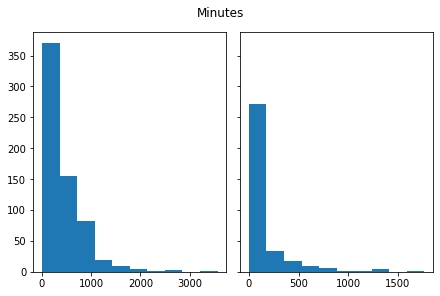

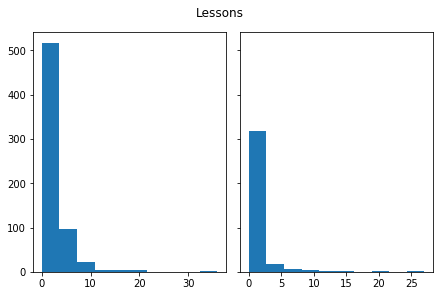

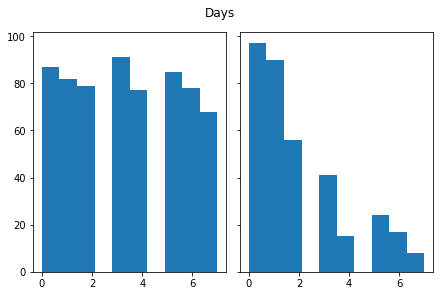

In [314]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharey=True,constrained_layout=True)

axs[0].hist(list(total_by_account_min.values()))
axs[1].hist(list(non_total_by_account_min.values()))
fig.suptitle('Minutes')

fig, axs = plt.subplots(1, 2, sharey=True, constrained_layout=True)
axs[0].hist(list(total_by_account_lesson.values()))
axs[1].hist(list(non_total_by_account_lesson.values()))
fig.suptitle('Lessons')

fig, axs = plt.subplots(1, 2, sharey=True,constrained_layout=True)
axs[0].hist(list(total_by_account_days.values()))
axs[1].hist(list(non_total_by_account_days.values()))
fig.suptitle('Days')

<class 'dict'>
